<a href="https://colab.research.google.com/github/cordeiroemg/Front-End-Dashboards/blob/main/1_Models_of_Population_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The four types of deterministic models are:
 1. Discrete, nonoverlapping generations
 2. Continuous random births and deaths,
 3. Overlapping generations, discrete time intervals,
 4. Overpapping generations, continous changes


# Model 1: Discrete, nonoverlapping generations

This model is the simplest description of the population growth. The basic assuption is that parental reproduction stops before offspring reach adulthood. Time is measures most conveniently in units of generations. This model best describes annual plants, but can be an acceptable first approximation for more complex systems. Its greatest streghts is its simplicity. $Nt$ is the number of individuals at time $t$, measured in generations. If the average number of progeny is per individual is $w$, the population number in generation t is expressed in the previous generation, $t - 1$, as:

$$N_t = w \cdot N_{t-1} $$  


As its now becomes clear, w is a measure of both survival and reproduction. Individuals who do not survive to reproduce are counted as leving no progeny. Thus, w is called Darwinian fitness, of simply fitness. It is convenient to count the population as zygotes, so that the survival and reproduction of an individual occur within the same generation.

$$ N_t = w(w \cdot N_{t-2}) = w^{2} N_{t-2} $$

We can generalize by:


$$ N_t = N_{0} \cdot w^{t} $$


If we consider that,

$$ w = 1 + s $$


Where s is equivalent to interest rate. Thus, if $w> 1$ or $s> 0$, the population increases. Alternatively, if w < 1 or s < 0, population will decrease.

$$
\begin{align}
&N_{t+1} = w \cdot N_{t}\\
&N_{t+1} = (1 + s) \cdot N_{t}\\
&N_{t+1} = N_{t} + s \cdot N_{t}\\
&N_{t+1} - N_{t-1} = s \cdot N_{t}\\
&\Delta N_t = s \cdot N_{t}
\end{align}
$$


Thus

$$\frac{\Delta N_t}{N_{t}} = s $$

The proportion by which the population changes in one generation is give by s.

If the population is composed by several kinds of individuals (many genotypes) with different fitnesss, then the whole population increasing or decreasing at the same rate as if all the individuals were of averange fitness.


Consider that $n_1, n_2, n_3, ..., n_k$ is the number of each k types in the population in generation $t-1$, then lets $w_1, w_2, w_3, ..., w_k$ assume that $n_1 + n_2 + n_3 + ... + n_k = N$


$$
\begin{align}
&\bar w = \frac{n_1 w_1 + n_2 w_2 + ... + n_k w_k}{n_1 + n_2 + ... + n_k}\\
&\bar w = \frac{\sum n_i w_i}{N_{t-1}}\\
&\bar w = \frac{\sum n_i w_i}{\sum n_{i}}
\end{align}
$$


Considering that at any given time,

$$ N_t = n_1 w_1 + n_2 w_2 + ... + n_k w_k = \sum n_i w_i$$

Then,

$$ N_t = \bar w \cdot N_{t-1}$$


The implications are simple as the fitnesses of the different types are inherited, those with greater fitness will be represented in greater proportion in the next generation. Hence, $\bar w$ is expected to change as the most fit individuals increase in proportion.


To summarize: with a discrete generation model and variable fitnesses, the weighted arithmetic mean is appropriate for contemporary differences, while the geometric mean is appropriate for averaging over different generation.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
pd.set_option('display.float_format', '{:.3g}'.format)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 500)
plt.rcParams.update({'font.size': 14})

In [ ]:
initial_population = 100
generations = 50
fitness_value = [1.2, 1.1, 0.9]
genotype_counts = [50, 30, 20]

def calculate_average_fitness(genotype_counts, fitness_value):
  total_fitness = sum( n * w for n, w in zip(genotype_counts, fitness_value))
  total_genotypes = sum(genotype_counts)
  return total_fitness / total_genotypes if total_genotypes > 0 else 0

In [ ]:
populations = []
genotypes = []
fitness = []
current_population = initial_population
current_genotype_counts = genotype_counts.copy()
fitness_values = fitness_value.copy()


for t in range(generations):
  average_fitness = calculate_average_fitness(current_genotype_counts, fitness_values)
  fitness.append(average_fitness)
  populations.append(current_population)

  # Update population for the next generation
  current_population = average_fitness * current_population

  # update genotype counts
  current_genotype_counts = [int(n * average_fitness) for n in current_genotype_counts]
  #print(current_genotype_counts)
  genotypes.append(current_genotype_counts)

In [ ]:
current_population

23311.789279027773

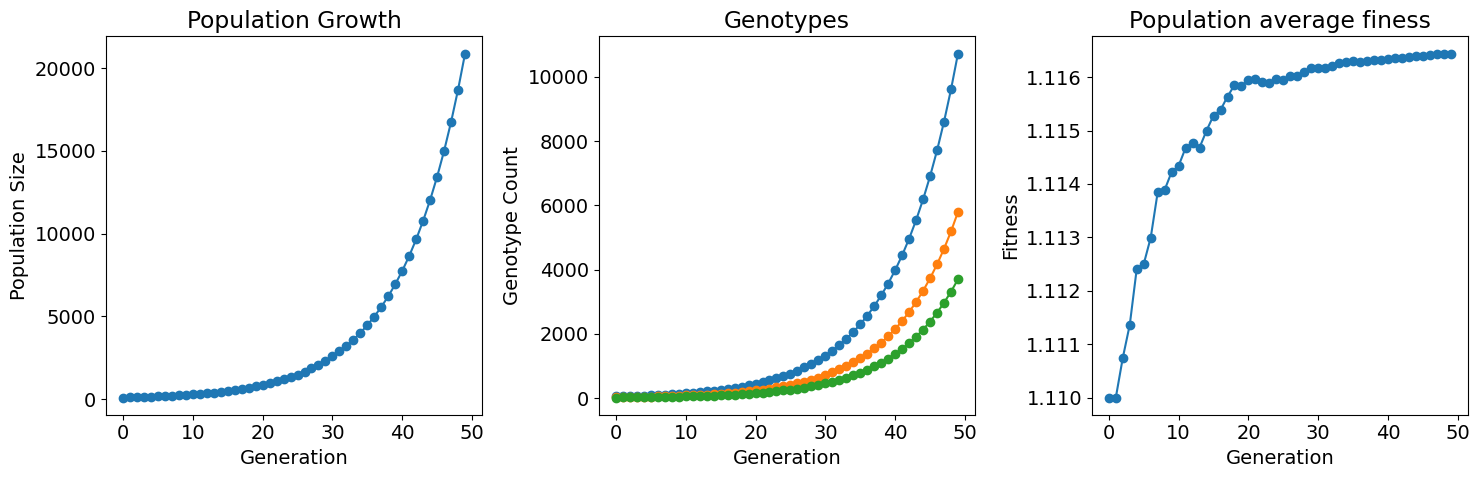

In [ ]:
fig, axs = plt.subplots (1,3, figsize = (15,5))

axs[0].plot(range(generations), populations, marker = 'o')
axs[0].set_title('Population Growth')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Population Size')

axs[1].plot(range(generations), genotypes, marker = 'o')
axs[1].set_title('Genotypes')
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Genotype Count')

axs[2].plot(range(generations), fitness, marker = 'o')
axs[2].set_title('Population average finess')
axs[2].set_xlabel('Generation')
axs[2].set_ylabel('Fitness')

plt.tight_layout()

# Model 2: Continuous Random Birth and Deaths

In this model we regard the population the number Nt at time t as being very large. In an infinitesimal time interval $\Delta t$ a fraction $b \cdot \Delta t$ produce offspring and a fraction  $d \cdot \Delta t$ die. Thus the change in population number during this interval is

$$
\begin{align}
&\Delta N_t = (b-d) \cdot N_t \Delta t\\
&\Delta N_t = m \cdot N_t \Delta t
\end{align}
$$

Where $m = b - d$ and $\Delta t \rightarrow 0$, than

$$\frac{dN_t}{d_t} = m \cdot N_t$$

In integrated form,

$$mt = log_e N_t - log_e N_0$$

or


$$
\large N_t = N_0 \cdot e^{mt}
$$


This can be measured in any convenient units such as hours, days, weeks, or years. In any case m is measured in the reciprocal of the same units (per hour, per day, etc.).

In its strictest form this model applies only to such situation as bacterial growth in an unrestricted environment. Each individuals is regarded as equally likely to die or to reproduce in any instant. On the other hand most populations are neither decreasing nor increasing very rapidly. THe age distribution is often very near to equilibrium so that average birth and death rates are nearly constant. We find that 1.1 and 1.3 are correspondent in

$$
\begin{align}
&N_t = w \cdot N_{t-1}\\
&w \cdot N_0 = N_0 \cdot e^{m}\\
&w  = e^{mt}\\
&m = log_e{w}
\end{align}
$$


The continuous population changes such that unit is chosen so that $ m = log_e{w}$, the continous population changes such that, if counted at time intervals conrresponding to thes units the numbers correspond to the discrete population. Thus measuring time in such units makes t in this sense equivalent to the number of generations in a discrete population.

If w is nearly 1, and therefore s is very small, then $log_e (1+s)$ will be very close to s. Thus for very slow change s and m are very similar.


Consider a discrete population that reproduces once each year, each parent giving rise to two progeny and dying immediately after. Thus, $\bar w = 2$. The population doubles each year

$$
\begin{align}
&N_t = 2 \cdot N_{t-1}\\
&N_t = N_0 \cdot 2^{t}
\end{align}
$$


A second population is growing continously at such a rate as to double in a year's time. $N_t = N_0 \cdot 2^t$; considering $e^m = 2$ or $ m = log_e 2 = 0.693$. Thus, $N_t = N_0 \cdot e^{0.693 \cdot t}$

Consider a third population now also growing continously, but has a growth rate equivalent to 100% interest compounded continously. That is to say, $ m= 1$ and $ dN_t/d_t = N_t$. Integrating $N_t = N_0 \cdot e^t$; each year the population increases by a factor $e =2.71$.

More generally, the relations of $w's, s's$ and $m's$ of the three populations are:

* Population 1: $w=1 +s$, such that $N_t = N_0 \cdot w^t$

* Population 2: $m = log_e w = log_e(1+s)$, such that $N_t = N_0 \cdot e^{mt}$ and $m = log_e w$

* Population 3: $m=s$ such that $N_t = N_0 \cdot e^{mt}.

In all three cases, $ s =1$


In [ ]:
N0 = 10 # initial population size
s = 1   # Growth rate parameter
w = 1 + s # Growth rate for population 1, w = 2
m2 = np.log(2) # Growth rate for population 2, (m = log_e(2) = 0.693)
m3 = s    # Growth rate for population 3, (m = s = 1)
years = 4 # Number of years to simulate



# Time array
t = np.arange(0, years + 1)
t_c = np.linspace(0, years, 20)

# Population 1: Discrete growth (doubling each year)

N1 = N0 * (w**t)

# Population 2: Continuous growth (doubling each year)

N2 = N0 * np.exp(m2* t_c)

# Population 3: Continuous growth (100% interest)

N3 = N0 * np.exp(m3* t_c)

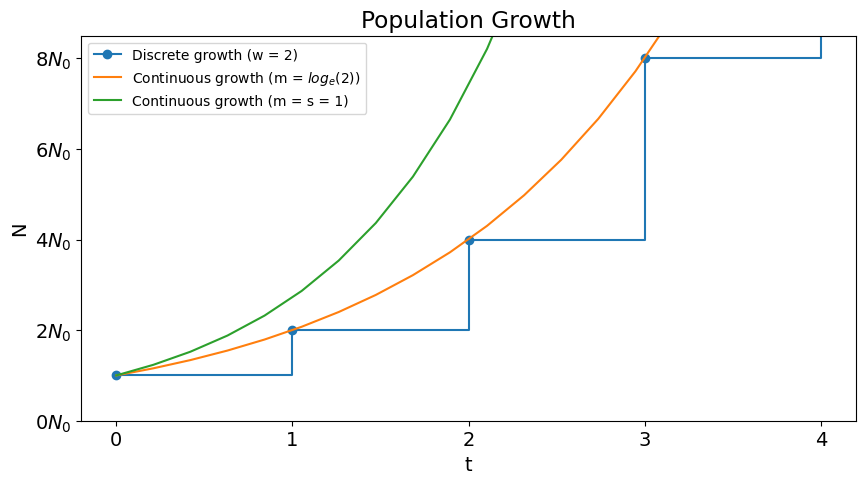

In [ ]:
plt.figure(figsize= (10,5))

plt.step(t, N1, label = 'Discrete growth (w = 2)', where = 'post', marker = 'o')
plt.plot(t_c, N2, label = 'Continuous growth (m = $log_e(2)$)')
plt.plot(t_c, N3, label = 'Continuous growth (m = s = 1)')

plt.yticks(np.arange(0, 10*N0, 2*N0), labels=[f'{2*i}$N_0$' for i in range(0, 5)])
plt.xticks(np.arange(0,5,1))

plt.title('Population Growth')
plt.xlabel('t')
plt.ylabel('N')
plt.ylim(0, 8.5*N0)
plt.legend(fontsize= 10)
plt.grid(False)
plt.show()

We shall call $w$ the fitness or the Wrightian fitness, after Sewall Wright, R. A. Fisher designed m as the Mathusian parameter. Although used here as as measures of the absolute rate of increse, $w$ and $m$ are also used for the relative rates of different types.

Notice that if there are no births, we can rewrite the equation simple as;

$$
dN_t = \hat d \cdot N_t dt
$$

Which, on integration, is

$$ dN_t =  N_0 \cdot e^{\hat d t}
$$



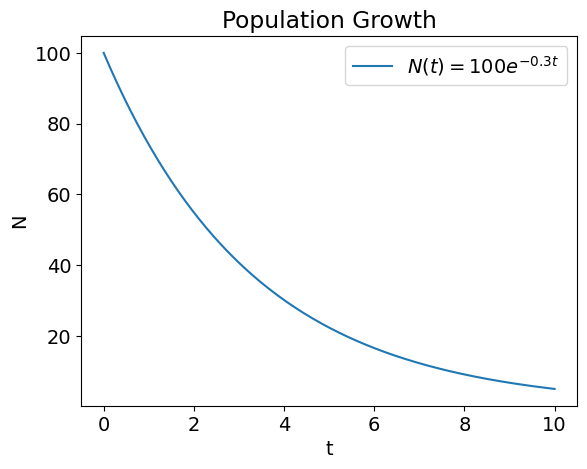

In [ ]:
t = np.linspace(0, 10, 200)
N0 = 100
d_hat = 0.3
N = N0 * np.exp(- d_hat * t)

plt.plot(t, N, label=f'$N(t) = {N0} e^{{-{d_hat} t}}$')
plt.title('Population Growth')
plt.xlabel('t')
plt.ylabel('N')
plt.legend()
plt.grid(False)
plt.show()

Hence the life expectancy curve is exponential with each survival having a constant probability of surviving for another time unit. If there are different fitness of the different types in the population, then

\begin
$ \frac{dN}{dt} = m_1 n_1 + m_2 n_2 + ... + m_k n_k $

$ \frac{dN}{dt} = \bar m N$


Where

$ \bar m = \frac{\sum n_i m_i}{\sum n_i} = \frac{\sum n_i m_i}{N}$





Hence, as with w in the discrete model, it is appropriate to replace m with the weighted average of m's in the population. When $\bar m$ varies in time we can think of time as broken into $k$ intervals of length $\Delta t$ during each of which $\bar m$ is different.


\begin{align}
&N_t = N_0( e^{\bar m_1 \Delta t_1})( e^{\bar m_2 \Delta t_2})...( e^{\bar m_k \Delta t_k})\\
&N_t = e^{\bar m_1 \Delta t_1 + \bar m_2 \Delta t_2 + ... + \bar m_k \Delta t_k}\\
&N_t = N_0 e^{\bar m t}\\
\end{align}


Where

\begin{align}
\bar m = \frac{\sum \Delta t_i \bar m_i}{\sum \Delta t_i} = \frac{\sum \Delta t_i \bar m_i}{t}
\end{align}


Thus, in contrast to $w$ in the discrete model, with a continuous model the appropriate average is the arithmetic mean of the $m$'s. This is reasoble of course, since if $m = log \: w$ the arithmetic mean of m is the log of geometric mean of $w$.


If the fitness is heritable, then the average value of $m$ will change from generation to generation as the fitter types make a disproportionate contribution to future generations. This is another way of saying that natural selection will generally lead to an increase in the average fitness.

Our intuition tells us that the amount by which the average finess changes per unit time will be related to the variability in fitness among the different types in the population. We shall now show that the rate of increase is given by the mean squared deviation or the variance.

Consider, as before, that there are $k$ types with frequencies $n_1, n_2, ..., n_k$ and fitness $m_1, m_2, ..., m_k$ measured in Malthusian parameters, Assume that the fitness is each type is perfectly heritable and that the population do not interbreed. This would be appropriate to separate species, or to asexually propagating clones. The formulae would also apply to a single locus in a haploid population, to a plasmon, or to competition between self-fertilized strains.

We wish to know how $\bar m$ change with time. From the definition of $\bar m$ given by

$$
\frac{d\bar m}{dt}= \frac{d}{dt}\left[ \frac{\sum m_i n_i}{N} \right]
$$

As weighted average $\bar m$ and $N=\sum n_i$ are also variable. From the rules for differentiation, we have

$$
d \bar m = \frac{N\sum m_i \frac{dn_i}{dt}-(\sum m_i n_i) \frac{dN}{dt}}{N^2}
$$


but from previous equation,

$$
\frac{dn_i}{dt}= m_i n_i
$$

and

$$
\frac{N}{dt}= \bar m \cdot N
$$

Substituting these and recalling that $\sum m_i n_i = N \bar m$ we obtain,

$$
\frac{d \bar m}{dt}= \frac{\sum n_i m_i² - N \bar m²}{N}= V_m
$$

Where $V_m$ is the variance of the $m_i$'s. The rate of change in fitness at any instant, measured in Malthusian parameters, is equal to the variance in fitness at that time. The variance in this case is the variance in fitness among the types. In a Mendelian population with different genotypes there will be crossing amond the types. As expected, the rate of change in fitness is then determined not by the total variance, but by the part of the variance that is associated with trnasmissible gene difference.

In summary, the rate of change of mean fitness is equal to the variance of fitness.


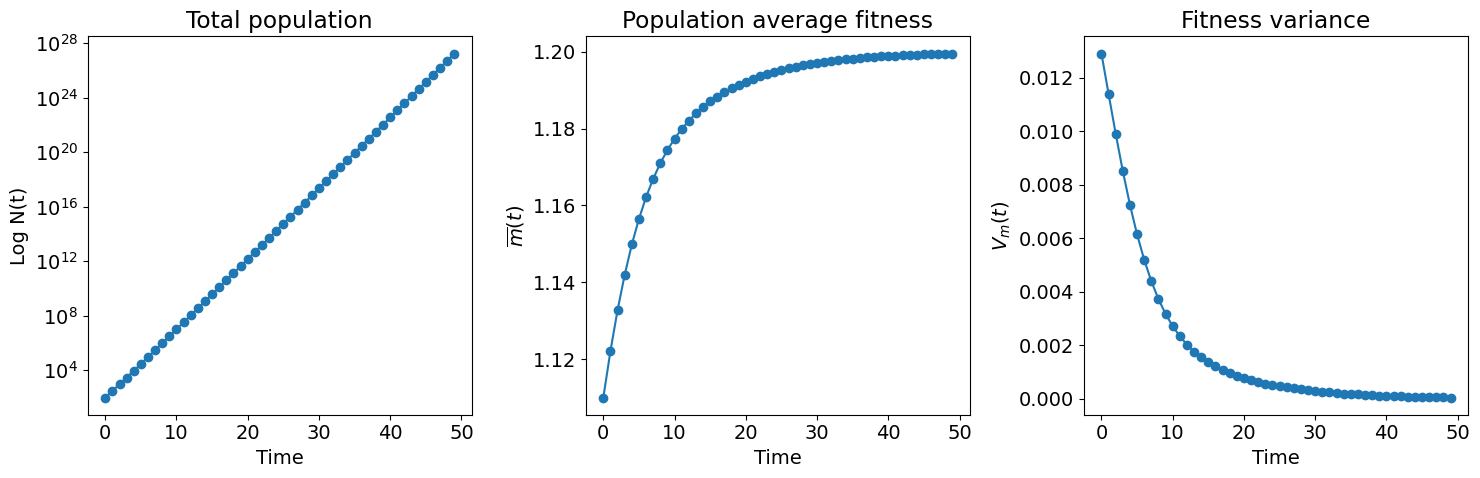

In [ ]:
generations = 50
types = 3
genotype_counts = np.array([50, 30, 20])
fitness_value = np.array([1.2, 1.1, 0.9])

dt= 1.0 # Time interval


# Initialize containers

n = np.zeros((generations, types))
n[0] = genotype_counts
N = np.zeros(generations)
mean_m = np.zeros(generations)
variance_m = np.zeros(generations)

# Initial values

N[0] = n[0].sum()
mean_m[0] = np.sum(n[0] * fitness_value)/N[0]
variance_m[0] = np.sum(n[0] * fitness_value ** 2)/ N[0] - mean_m[0]**2


# Dynamics

for t in range(1, generations):
  # Update each type independently (no mixing, perfect inheritance)
  n[t] = n[t-1] * np.exp(fitness_value * dt)

  # Update total population, mean fitness, and variance
  N[t] = n[t].sum()
  mean_m[t] = np.sum(n[t] * fitness_value)/N[t]
  variance_m[t] = np.sum(n[t] * fitness_value**2)/N[t] - mean_m[t]**2

fig, axs = plt.subplots (1,3, figsize = (15,5))


# Total population
axs[0].plot(range(generations), N, label='Total population', marker = 'o')
axs[0].set_yscale('log')
axs[0].set_title('Total population')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Log N(t)')


# Mean Fitness
axs[1].plot(range(generations), mean_m, label='Mean fitness', marker = 'o')
axs[1].set_title('Population average fitness')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('$\overline{m}(t)$')

# Variance
axs[2].plot(range(generations), variance_m, label='Variance', marker = 'o')
axs[2].set_title('Fitness variance')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('$V_m(t)$')

plt.tight_layout()
plt.show()

The total population grows exponentially but accelerated by increasing mean fitness. The mean fitness increases over time due to selection driven by heritable differences. Variance in fitness initially provides the 'fuel' for selection. Over the time, it typically declines as the fittest types dominate.

# Model 3: Overlapping Generations, DIscrete Time intervals


We now consider a more complicated model. The time is divided into discrete units, which are usually short relative to the life span. The model is especially appropriate for species, such as many birds and mammals, which have specific breeding season, but which may survive for seveal such seasons. It is also a good approximation for organisms, such as man, where population, although changing continuously, is censured at discrete intervals.

Let $n_{xt}$ be the number of individuals of age $x$ at time $t$. More precisely "age x" means "in the age interval x to x+1" as in ordinary discourse. In bisexual forms it is convenient to adopt some convention in regard to the sexes. One such is to count only females. Likewise, let $b_x$ be the average number of progeny produced by an individual of age $x$, counting only those progeny that survive long enough to be counted in the next time interval. To be concrete, we shall discuss the model as if time were measured in years.

For convenience we shall assume that no individual lives more than 5 years, although the procedure is obviously capable of being extended for any number of time intervals. Starting from $t=0$, the number of individuals of age $0$ at time $1$ will be the number born to parents of age $0$, $n_{00}b_0$ plus those born to parents of age $1$, $n_{10}b_1$ and so on. In turn, the number of age $1$ will be the number who were age $0$ at the time $0$ muliplided by the probability of surviving from age $0$ to age $1$, $n_{00}p_0$ and so for the other ages.

\begin{align}
&n_{01} = n_{00}b_0+ n_{10}b_1 + n_{20}b_2 + n_{30}b_3 + n_{40}b_4\\
&n_{11}= n_{00}p_0\\
&n_{21}= n_{10}p_1\\
&n_{31}= n_{20}p_2\\
&n_{41}= n_{30}p_3\\
&n_5 = 0\\
\end{align}

From these equations the composition of the population a year later can be worked out.

\begin{align}
&n_{02} = n_{01}b_0+ n_{11}b_1 + n_{21}b_2 + n_{31}b_3 + n_{41}b_4\\
&n_{11}= n_{01}p_0\\
&n_{21}= n_{11}p_1\\
&n_{31}= n_{21}p_2\\
&n_{41}= n_{31}p_3\\
\end{align}


and so on for later years

The following table gives data on composition of a population in successive years, starting with the highly artificial situation of 10,000 individuals of age 0. The survival probabilities are taken to be $p_0 = 0.8$, $p_1 = 0.9$, $p_2 = 0.9$, $p_3 = 0.7$, $p_4 = 0$ and the birth rated are $b_0 = 0$, $b_1 = 0.3$, $b_2 = 0.5$, $b_3 = 0.5$, $b_4 = 0.2$. Note that the population age distribution fluctuates for several generations, and then reaches a constant proportion for each age. At this time the population is increasing at a constant rate of $0.45%$ per year. This examples illustrates the general principle that nay population with a fixed schedule of age-specific birth and death rates eventually reaches a characteristic age distribution which remains stable. When this stage is reached the growth rate is constant and equations for both discrete and continuous growth discussed before are appliable.

The population growth ration $N_t /N_{t-1}$ converges to 1.0045 (0.45% per year) as expected.

In [ ]:
# Parameters
years = 26
age_classes = 5
p = np.array([0.8, 0.9, 0.9, 0.7, 0.0])
b = np.array([0.0, 0.3, 0.5, 0.5, 0.2])

# Initialize age structure: only age 0 at time 0
pop = np.zeros((years, age_classes), dtype=float)
pop[0, 0] = 10000

# Table columns: time, age groups, N_t, N_t / N_{t-1}
records = []

for t in range(1, years):
    # Births: sum of all reproductive contributions from previous time step
    births = np.sum(pop[t-1] * b)
    pop[t, 0] = births

    # Survivors: shift each age class forward with survival
    for age in range(1, age_classes):
        pop[t, age] = pop[t-1, age - 1] * p[age - 1]

# Assemble the results
N_t = pop.sum(axis=1)
growth_ratio = N_t[1:] / N_t[:-1]
growth_ratio = np.insert(growth_ratio, 0, np.nan)

df = pd.DataFrame({
    'Time (t)': np.arange(years),
    'Age 0-1': pop[:, 0].astype(int),
    'Age 1-2': pop[:, 1].astype(int),
    'Age 2-3': pop[:, 2].astype(int),
    'Age 3-4': pop[:, 3].astype(int),
    'Age 4-5': pop[:, 4].astype(int),
    'Total Population (N_t)': N_t.astype(int),
    'N_t / N_{t-1}': np.round(growth_ratio, 8)
})

pd.set_option('display.max_rows', None)
df.head(26)

,Time (t),Age 0-1,Age 1-2,Age 2-3,Age 3-4,Age 4-5,Total Population (N_t),N_t / N_{t-1}
0,0,10000,0,0,0,0,10000,NaN
1,1,0,8000,0,0,0,8000,0.8
2,2,2400,0,7200,0,0,9600,1.2
3,3,3600,1920,0,6480,0,12000,1.25
4,4,3816,2880,1728,0,4536,12960,1.08
5,5,2635,3052,2592,1555,0,9835,0.759
6,6,2989,2108,2747,2332,1088,11266,1.15
7,7,3390,2391,1897,2472,1632,11784,1.05
8,8,3229,2712,2152,1707,1730,11532,0.979
9,9,3089,2583,2441,1937,1195,11246,0.975


In [ ]:
df.columns

Index(['Time (t)', 'Age 0-1', 'Age 1-2', 'Age 2-3', 'Age 3-4', 'Age 4-5', 'Total Population (N_t)', 'N_t / N_{t-1}'], dtype='object')

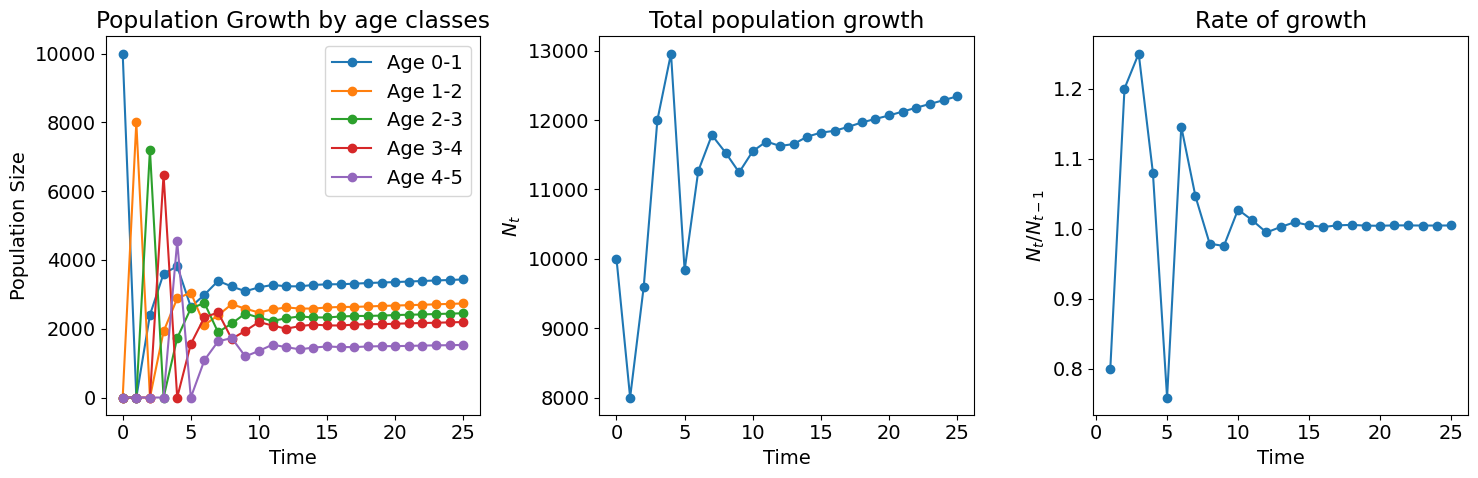

In [ ]:
fig, axs = plt.subplots (1,3, figsize = (15,5))

axs[0].plot(df['Time (t)'],df['Age 0-1'], label='Age 0-1', marker = 'o')
axs[0].plot(df['Time (t)'],df['Age 1-2'], label='Age 1-2', marker = 'o')
axs[0].plot(df['Time (t)'],df['Age 2-3'], label='Age 2-3', marker = 'o')
axs[0].plot(df['Time (t)'],df['Age 3-4'], label='Age 3-4', marker = 'o')
axs[0].plot(df['Time (t)'],df['Age 4-5'], label='Age 4-5', marker = 'o')
axs[0].set_title('Population Growth by age classes')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Population Size')
axs[0].legend()

axs[1].plot(df['Time (t)'], df['Total Population (N_t)'], label='Total Population', marker = 'o')
axs[1].set_title('Total population growth')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('$N_t$')


axs[2].plot(df['Time (t)'], df['N_t / N_{t-1}'], label='N_t / N_{t-1}', marker = 'o')
axs[2].set_title('Rate of growth')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('$N_t / N_{t-1}$')


plt.tight_layout()
plt.show()

# Model 4: Overlapping generations, continuous change

The methods of the previous section are specifically adaptted to an organism, such as many annually reproducing plants, where reproduction is seasonal but where the typical individual may live through several such seasons. In many orther organisms, ranging from short-lived insects to man, births as well as deaths occur at all times. If the population is large the discreteness introduced by individual births and deaths is lost in the large total and the process of population change can be regarded as essentially continuous. Mathematically we think of the process as the limit of the previous methods as the age intervals get smaller and smaller.

The equations for dealing with such a population were developed by Lotka and Fisher. Our procedure follows Fisher. TO be concrete, we shall think of the human population where time is measured in years.

We let $l(x)$ be the probability of survival from birth to age $x$. (We do not intend to imply that $x$ can take only integral values, at some instant a person may be 27.4658 years old. Let the probability of reproducing during the infinitesimal age interval from $x$ to $x+dx$ be $b(x) dx$. Then the probability of living to age $x$ and reproducing during the next time interval $dx$ is $l(x)b(x)dx$. The expected number of offspring per individual for his whole lifetime is this quantity summed over all ages, or


\begin{align}
\large \int_0^A l(x)b(x) \:dx
\end{align}


Where $A$ is the highest age at which reproduction is possible. For convenience mathematically we replace with $\infty$, which doesnt change anything since $b(x)$ is $0$ for all ages beyond $A$. If the integral is greater than 1 the population will eventually increase, although there may be temporary decreases because of changes in the age distribution, if the quantity is less than 1 the population will eventually decrease.

In the previous section we saw that a population with a constant set of age-specific birth and death rates attains a stbale age distribution. In this state the population will increase or decrease at a constant rate. To correspond to $\lambda$ or $w$ in the discrete case we use $e^m$ in the continuous case, where $m$ is the Malthusian parameter.


Of the population now alive (at time $t$), those of age $x$ were born $x$ years ago at time $t-x$. Let the number of births occurring in the interval $dt$ now be $B(t)dt$ . $B(t)$ is the instantaneous birth rate at time t, if this rate continued for a year, there would be $B(t)$ births. The birth rate $x$ years ago was $B(t-x)$. Of those born at that time a fraction $l(x)$ will still be alive and of these a fraction $b(x)dx$ will give birth during the interval $dx$. Thus the current birth rate of person of age $x$ will be $B(t-x) l(x) b(x), and this, summed over all ages, is the total birth rate at time $t$.


\begin{align}
\int_0^∞ B(t-x)l(x)b(x) \:dx
\end{align}

If the population has achieved age-distribution stability, its size is increasing at the rate $m$. In $x$ years the birth rate will have increased by a factor $e^{mx}$. Therefore, the rate $x$ years ago was fraction $e^{-mx}$ of the current rate.

\begin{align}
B(t-x) = B(t)e^{-mx}
\end{align}

After a few manipulation, we have

\begin{align}
\large 1 = \int_0^∞ e^{-mx}l(x)b(x) \:dx
\end{align}

This provides the means for calculating $m$ if $l(x)$ and $b(x)$ are known for all ages.

In actual practice, $m$ is usually computed from discrete data, since birth and death rates are usually given at discrete intervals.

Where a population has reached age-distribution stability the formulaes from the previous sections are also appliable.

\begin{align}
\frac{dN}{dt}= mN  &&and&& N_t = N_0 e^{mt}
\end{align}


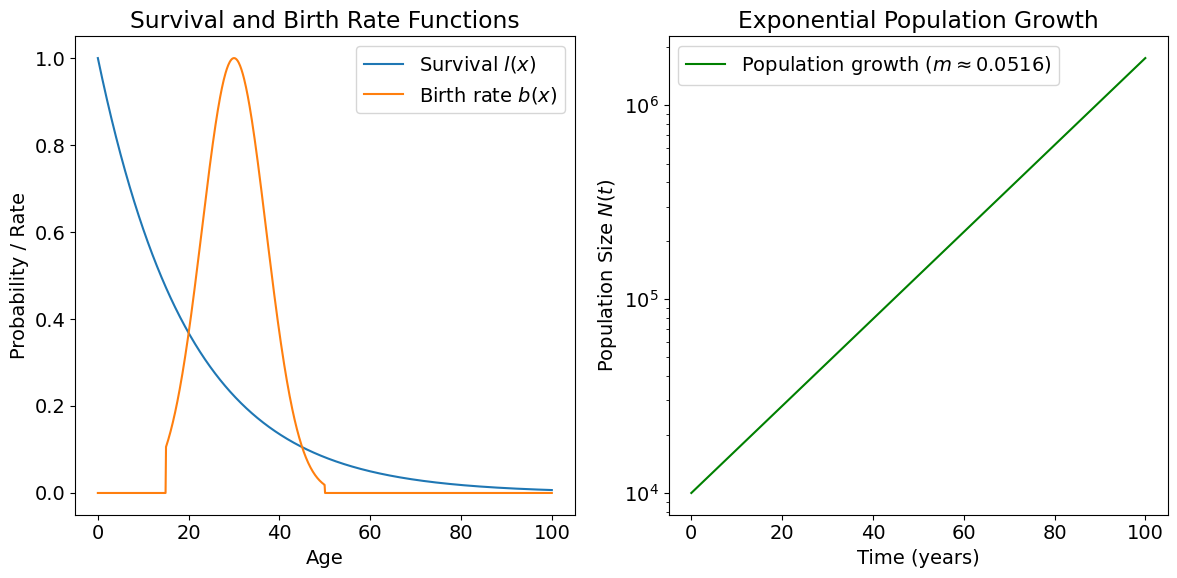

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from scipy.integrate import quad

# Define age range
x = np.linspace(0, 100, 1000)

# Example l(x): survival curve — decaying exponentially
def l(x): return np.exp(-0.05 * x)

# Example b(x): age-specific birth curve — bell-shaped, peak at ~30
def b(x): return np.where((x > 15) & (x < 50), np.exp(-0.01*(x-30)**2), 0)

# Lotka-Euler function to find m: 1 = ∫ e^{-mx} l(x) b(x) dx
def lotka_equation(m):
    integrand = lambda x: np.exp(-m * x) * l(x) * b(x)
    result, _ = quad(integrand, 0, 100)
    return 1 - result

# Solve for m numerically
sol = root_scalar(lotka_equation, bracket=[0.001, 1.0], method='brentq')
m_est = sol.root

# Project population size over time
t = np.linspace(0, 100, 200)
N_0 = 1e4
N_t = N_0 * np.exp(m_est * t)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, l(x), label="Survival $l(x)$")
plt.plot(x, b(x), label="Birth rate $b(x)$")
plt.title("Survival and Birth Rate Functions")
plt.xlabel("Age")
plt.ylabel("Probability / Rate")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, N_t, color='green', label=f"Population growth ($m \\approx {m_est:.4f}$)")
plt.title("Exponential Population Growth")
plt.xlabel("Time (years)")
plt.ylabel("Population Size $N(t)$")
plt.yscale("log")
plt.legend()

plt.tight_layout()
plt.show()





# Fisher's Measure of Reproductive value

Fisher also ask a genetically relevant question: To what extent does an individual of age $x$ contribute to the ancestry of future generations?
In order to answer this, he defines the quantity $v(x)$, the reproductive value at age $x$. Obviously the reproduction value is $0$ for an individual who is past the reproductive age. It clearly is lower at birth than a few years later, since a person of age 10, say, has a better chance of surviving to reproduce than has a child at birth. Furthermore, the reproduction would begin sooner and, in a growing population, this would increase the total contribution fo future years by an earlier start. The value might be expected to be maximum somewhere near the beginning of the reproductive period.
To define the reproductive value we note first that the number of births from parents of age x is proportional to $e^{-mx}l(x)b(x)dx$, as shown in the previous section. If we now think of this cohort of persons followed through the rest of their lifetimes, their total contribution is proportional to

\begin{align}
\large \int_x^∞ e^{-my}l(y)b(y)dy
\end{align}



The exponential term serves to diminish the value of children born a long time in the future. This is analogous to the situation where the present value of a loan or investiment is greater if it is to be paid soon rather than later. This is reverse, of course, if $m$ is negative. The reproductive value is proportional to the total contribution per indiviual of this age, so we divide the contribution by the number of person of that age. This leads to the definition of reproductive value at age $x$, which is the **expected future constibution** of an individual of age x to all **future generations**, discounted by the population growth rate $m$, given by:


\begin{align}
v(x)=\frac{\int_x^∞ e^{-my}l(y)b(y)dy}{e^{-mx}l(x)}
\end{align}



If $x=0$, the denominator is equal to 1. Likewise, if $x=0$, the numerator is equal to 1. Therefore, the reproductive value at birth is 1, and $v(x)$ is a measure of the reproductive value of an individual of age $x$ relative to that of a new born child. Earlier, we discussed the situation as if the population were in age-distribution equilibrium. On the other hand, we can accept the definition as given and apply it to populations in general. We can then accept that irrespective of the age distribution, the total reproductive value of a population increases at a rate given by $m$.


\begin{align}
&e^{-mx}l(x) \cdot v(x)=\int_x^∞ e^{-my}l(y)b(y)dy\\
&e^{-mx}l(x) \left[ v(x) \frac{dl(x)}{dx} + l(x) \frac{dv(x)}{dx} - v(x)l(x)m\right] = -e^{-mx}l(x)b(x)
\end{align}

We can cancel $e^{-mx}$ both sides and divide by $v(x)l(x)$.

\begin{align}
\frac{1}{lx}\frac{dl(x)}{dx}+\frac{1}{v(x)}\frac{d(v(x)}{dx}-m= -\frac{bx}{v(x)}
\end{align}


The leftmost term, with sign change, is simply the death rate $d(x)$, for it is the rate of decrease in the number of age $x$ expressed as a fraction of the proportion alive at that age. Making this substitution and rearranging, we obtain

\begin{align}
\frac{dv(x)}{dx}-v(x) d(x) + b(x) = mv(x)
\end{align}

The first term is the rate of **change in the reproductive value** of an individual as his age increases. The second is the rate of decrease in reproductive value per individual caused by deaths of individuals of age $x$ (**mortality rate**). The third is the rate of increase in reproductive value from new births (**birth rate**); this is simpy the instataneous birth rate, since the value of each newborn child, $v(x)$s, is equal to $1$. The left side of the equation, then, is the net change in reproductive value of the population contributed by an individual of age $x$, either by growing older, by dying, or by giving birth. The $n(x)$ individuals of age $x$ then contribute $mn(x)v(x)$ to the increase in reproductive value of the populaiton. Thus the rate of change in reproductive value for each age group is given by $m$. Adding up all ages, we have:

\begin{align}
\frac{dv}{dt}=mV(t) &&⇒&& V_t = V_0\cdot e^{mt}
\end{align}


where $V(t)$
\begin{align}
V(t) = \int_0^∞ n(x,t)v(x)dx
\end{align}

Which is the total reproductive value of the population.

This demonstrates Fisher's principle: The rate of increase in total reproductive value is equal to the Malthusian parameter times the total reproductive value, regardless of the age distribution. This means that the equalitons become applicable for populations not at age equilibrium if each individual in the population is weighted by the reproductive value appropriate to his age.

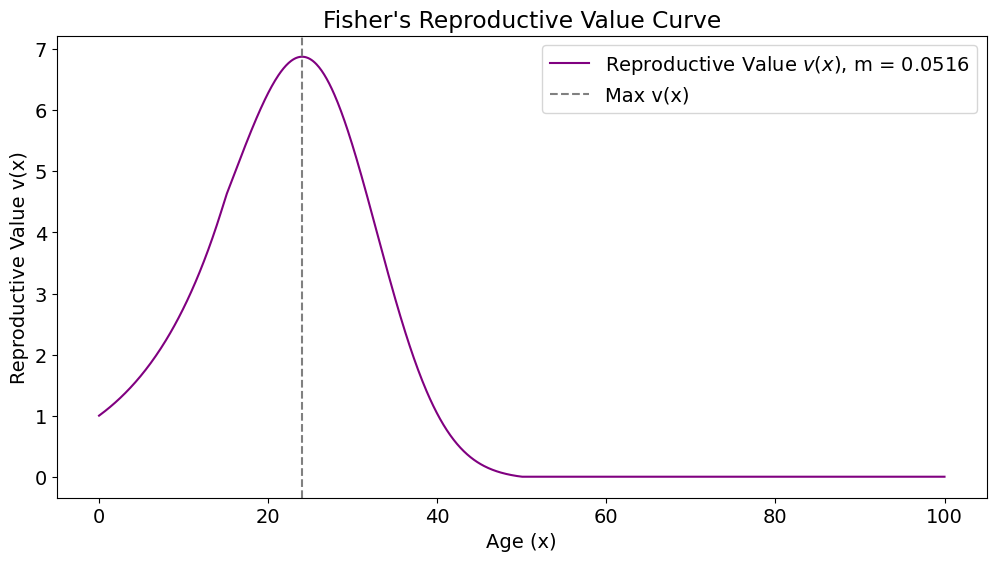

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Age range
x_vals = np.linspace(0, 100, 1000)

# Define l(x) and b(x)
def l(x): return np.exp(-0.05 * x)                     # Survival curve
def b(x): return np.where((x > 15) & (x < 50), np.exp(-0.01*(x - 30)**2), 0)  # Birth rate curve

# Estimate m from Lotka-Euler equation
from scipy.optimize import root_scalar
def lotka_eqn(m):
    integrand = lambda x: np.exp(-m * x) * l(x) * b(x)
    return 1 - quad(integrand, 0, 100)[0]

m = root_scalar(lotka_eqn, bracket=[0.001, 1.0], method='brentq').root

# Define reproductive value function v(x)
def v(x):
    numerator = quad(lambda y: np.exp(-m * y) * l(y) * b(y), x, 100)[0]
    denominator = np.exp(-m * x) * l(x)
    return numerator / denominator

v_vals = np.array([v(xi) for xi in x_vals])

# Plot reproductive value
plt.figure(figsize=(12, 6))
plt.plot(x_vals, v_vals, label=f"Reproductive Value $v(x)$, m = {m:.4f}", color='purple')
plt.xlabel("Age (x)")
plt.ylabel("Reproductive Value v(x)")
plt.title("Fisher's Reproductive Value Curve")
plt.axvline(x_vals[np.argmax(v_vals)], color='gray', linestyle='--', label="Max v(x)")
plt.legend()
plt.grid(False)
plt.show()


# Regulation of population Number

We have said nothing so far about population regulation. It is obvious that a population cannot grow exponentially forever. It must eventually reach a stat where $m$ becomes $0$ or negative, or where in a discrete model $w$ becomes $1$ or less. The growth rate is eventually limited by all the factors that collectively make up the carrying capacity of the environment.
In population genetics we are mainly concerned with the changes in proportions of different types of individuals, rather than total numbers. We shall consider some examples of this under various types of population regulation. However, we shall ignore until later in the book the complications introduced by Mendelian inheritance.
We shall be dealing in this section with continuous models of the type introduced before. Alternatively, in principle we could deal with reproductive values rather than actual numbers by weighting each individual by the reproductive value appropriate to its age. By modifying previous growth equations, we have:

\begin{align}
\large \frac{dN}{dt}=rN \left[ 1- f(N) \right]
\end{align}

The quantity $r$ is the intrinsic rate of increase-the rate at which the population would grow if it had unlimited food supply and room for expansion. The function $f(N)$ implies some change in the rate of increase with the size of the population. The regulation may be, for example, by limitation of food supply, by the space available, by the accumulation of toxic products, or by territorial behavior patterns.

A particularly simple mode is provided by letting $f(N)$ be a linear function of $N$, say $N/K$, where $K$ is a constant sometimes called the carrying capacity of the environment. Such a population will grow approximately exponentially as long as $N$ is much smaller than $K$, but as $N$ approaches $K$ the rate will decrease until size stability is reached at $N=K$. If we replace $N/K$ for $f(N)$, then

\begin{align}
\large \frac{dN}{dt}=\frac{rN(K-N)}{K}
\end{align}

When $N \lt\lt  K$ the growth is almost exponential, but as $N ⇒ K$ growth slows and $dN/dt → 0$

The equation can also be rewritten as

\begin{align}
\frac{dN}{dt}+\frac{dN}{K-N}= rd_t
\end{align}

When integrated gives:

\begin{align}
t = \frac{1}{r}\cdot ln\frac{N_t(K-N_0)}{(K-N_t)N_0}
\end{align}

For example, if the intrinsic rate of increase of a population is 1% per year $(r=0.01)$ and the carrying capacity, $K$, is 5000, the time, $t$, required to change the number from $N_0=1000$ to $N_t = 2000$ is


\begin{align}
t = \frac{1}{0.01} \cdot ln \frac{2000 \cdot 4000}{3000 \cdot 1000} = 98 \:years.
\end{align}

If there were no regulations, the time required would simply be:

\begin{align}
t = \frac{1}{0.01} \cdot ln \frac{N_t}{N_0} = 69 \:years.
\end{align}


Note that, whether there is regulation or not, the time required for a certain change is proportional to $1/r$.
We can also write the equation in the inverse form, giving the number at time $t$ as a function of $t$ and the initial number $N_0$.

\begin{align}
N_t = \frac{K}{1 + C_0 e^{-rt}}
\end{align}

Where
\begin{align}
C_0= \frac{K-N_0}{N_0}
\end{align}

This function can be graphically visualized and is called 'logistic' curve of population increase and has been widely used in ecology.

Of course it is merely the simplest of a number of equations that could be derived and many populations, natural and experimental, depart widely from the model.

As stated earlier, we are mainly concerned in population genetics with the proportion of different genes and genotypes rather than the total number. We shall see that many of the equations for the proportions of different types are the same, despite quite different mechanisms for regulation of the population number.


The intrinsic rate of increase, $r$, is closely related to the Malthusian parameter $m$. $m$ can also being seen as the realized growth rate. We shall use the latter for the actual rate of change in numbers of the population, or of a part of the population, and $r$ for the value this would take in a situation where the growth rate is not regulated.

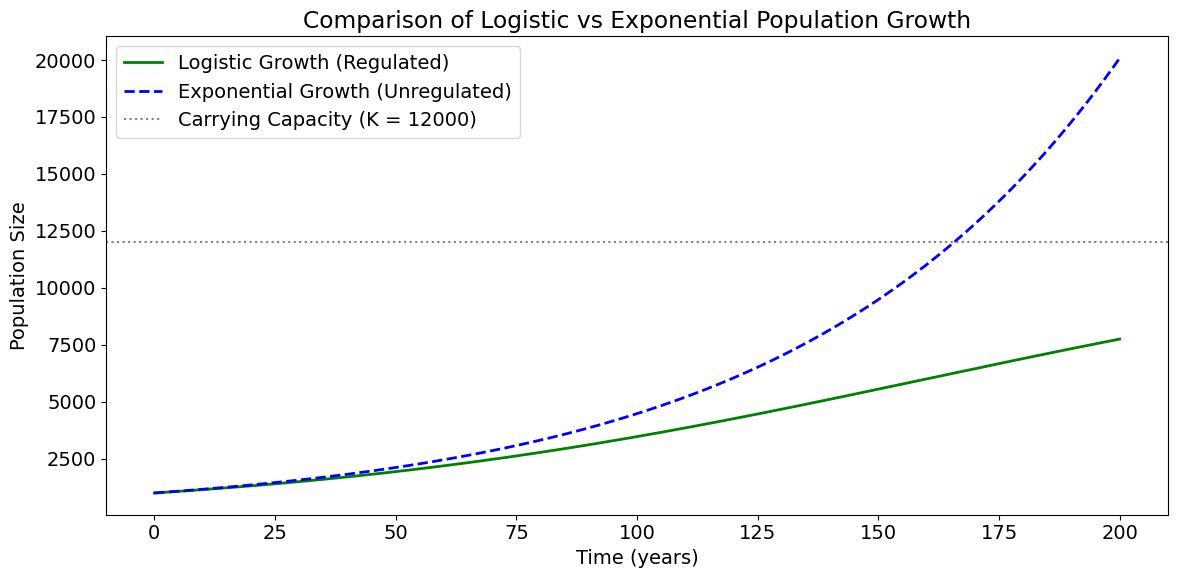

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 0.015  # intrinsic rate of increase
K = 12000  # carrying capacity
N0 = 1000  # initial population

# Time range
t = np.linspace(0, 200, 1000)

# Logistic growth model
C0 = (K - N0) / N0
N_t_logistic = K / (1 + C0 * np.exp(-r * t))

# Exponential growth model (no regulation)
N_t_exponential = N0 * np.exp(r * t)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, N_t_logistic, label="Logistic Growth (Regulated)", linewidth=2, color="green")
plt.plot(t, N_t_exponential, label="Exponential Growth (Unregulated)", linewidth=2, linestyle='--', color="blue")
plt.axhline(K, color='gray', linestyle=':', label=f"Carrying Capacity (K = {K})")
plt.xlabel("Time (years)")
plt.ylabel("Population Size")
plt.title("Comparison of Logistic vs Exponential Population Growth")
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


## Unregulated Growth

Consider two strains, 1 and 2, with numbers $n_1$ and $n_2$ and intrinsic growth rates $r_1$ and $r_2$. These are the same as the Malthusian parameters when there is no restriction on continuous expotential growth. Let $N$ be the total population number; $N = n_1 + n_2$. We shall designate by $p_1 = n_1/N$ and $p_2 = n_2/N$ the proportions of the two strains. If there is no regulation of the growth of either strain the rates of increase are

\begin{align}
\frac{dn_1}{dt}= r_1 n_1 &&and&& \frac{dn_2}{dt}= r_2 n_2
\end{align}


The rate of increase of the total population is

\begin{align}
\frac{dN}{dt}= r_1 n_1 + r_2 n_2 = \bar r N
\end{align}

where $\bar r$ is the mean of $r$'s, weighted by the numbers in each population. To obtain the rate of change in the proportion of the two types, we write:

\begin{align}
&\frac{d \: ln(p_1/p_2)}{dt}= \frac{d \: ln(n_1/n_2)}{dt}\\
&\frac{d \: ln(p_1/p_2)}{dt}=\frac{d \: ln(n_1)}{dt}-\frac{d \: ln (n_2)}{dt}\\ &\frac{d \: ln(p_1/p_2)}{dt}= \frac{d \: ln(n_1)}{n_1 dt}-\frac{d \: ln(n_2)}{n_2 dt}\\
&\frac{d \: ln(p_1/p_2)}{dt}= r_1 - r_2\\
\end{align}

and also

\begin{align}
&\frac{d \: ln(p_1/p_2)}{dt}= \frac{d \: ln(p_1)}{dt} - \frac{d \: ln(1- p_1)}{dt}\\
&\frac{d \: ln(p_1/p_2)}{dt}= \frac{dp_1}{p_1(1- p_1)dt}
\end{align}

Combing the two equations

\begin{align}
\frac{dp_1}{dt} = (r_1 - r_2) \cdot p_1(1 - p_1)
\end{align}

Notice that if we let $p_1 = N/K$ and $r_1 - r_2 = r$ we obteain the logistic equation discussed earlier. Despite the fact that both strains are growing exponentially, the proportion of one type (the faster growing one) is increasing according to the logistic equation. We can simplify a bit further by considering $\bar r = p_1 r_1 + p_2 r_2$.

\begin{align}
\frac{d p_1}{dt} = p_1 (r_1 - \bar r)
\end{align}

This form of the equation suggests the extension to more than two strains. When three or more strains are present the same equation is correct for rate of change of a particular strain and $\bar r$ is the weighted average of the rates of increase of all the strains.

In this model the total population is increasing expotentially at any instant, although the rate of increase, $\bar r$, is changin continuously unrealistic for any long period of time. We only discuss it here to make the point that the model can accuretely describe the rate of change of the proportion of one type in a mixed population even when the number are changing according to quite a different rule.

illustrate how those models presented work in python

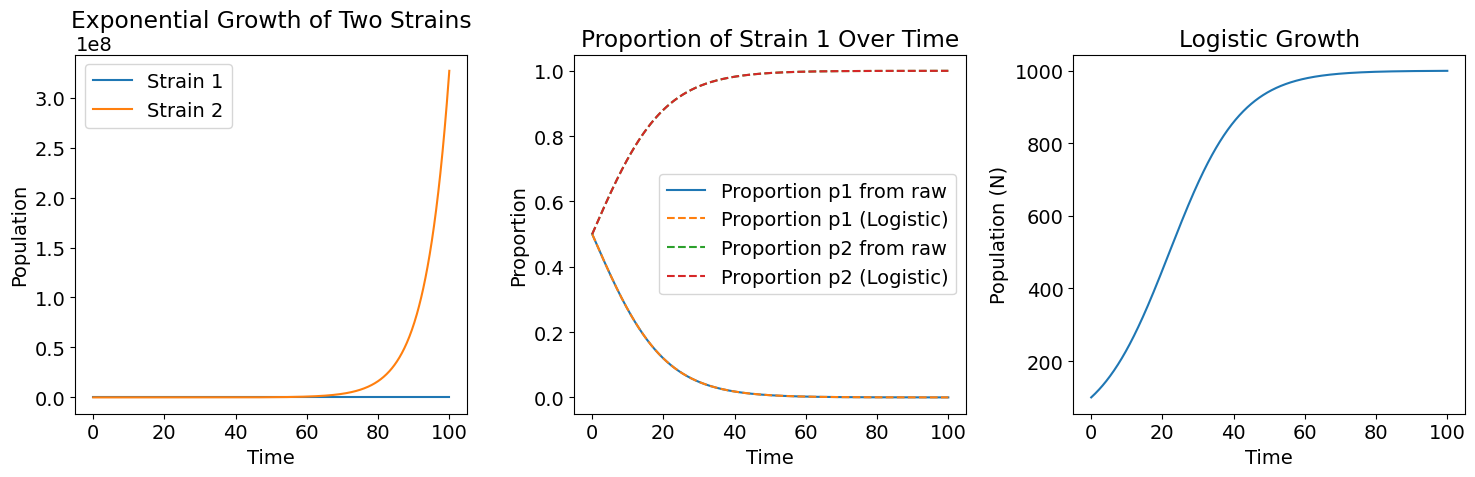

In [ ]:
# Re-import necessary libraries after code execution state reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Time range
t = np.linspace(0, 100, 1000)

# Model parameters
r1 = 0.05  # Growth rate for strain 1
r2 = 0.15  # Growth rate for strain 2
n1_0 = 100  # Initial population of strain 1
n2_0 = 100  # Initial population of strain 2

# Unregulated exponential growth
def exponential_growth(n, t, r):
    return r * n

n1 = odeint(exponential_growth, n1_0, t, args=(r1,)).flatten()
n2 = odeint(exponential_growth, n2_0, t, args=(r2,)).flatten()
N = n1 + n2
p1 = n1 / N

# Logistic equation for p1 (change in proportion)
def dp1_dt(p1, t, r_diff):
    return r_diff * p1 * (1 - p1)

p1_logistic = odeint(dp1_dt, n1_0 / (n1_0 + n2_0), t, args=(r1 - r2,)).flatten()

# Logistic population growth
def logistic_growth(N, t, r, K):
    return r * N * (1 - N / K)

K = 1000
N0 = 100
r = 0.1

N_logistic = odeint(logistic_growth, N0, t, args=(r, K)).flatten()

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(t, n1, label='Strain 1')
axs[0].plot(t, n2, label='Strain 2')
axs[0].set_title("Exponential Growth of Two Strains")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Population")
axs[0].legend()

axs[1].plot(t, p1, label='Proportion p1 from raw')
axs[1].plot(t, p1_logistic, '--', label='Proportion p1 (Logistic)')
axs[1].plot(t, (1-p1), '--', label='Proportion p2 from raw')
axs[1].plot(t, (1-p1_logistic), '--', label='Proportion p2 (Logistic)')
axs[1].set_title("Proportion of Strain 1 Over Time")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Proportion")
axs[1].legend()

axs[2].plot(t, N_logistic)
axs[2].set_title("Logistic Growth")
axs[2].set_xlabel("Time")
axs[2].set_ylabel("Population (N)")

plt.tight_layout()
plt.show()


## Logistic Regulation of Total Number

A simple model for this situation is given by the equations:

\begin{align}
\frac{dn_1}{dt}=n_1(r_1 - \bar rN/K)   &&and&& \frac{dn_2}{dt}= n_2(r_2- \bar rN/K)
\end{align}

The total population increases logistically until it reaches an equilibrium at $N=K$, as can be seen by the following:

\begin{align}
\frac{dN}{dt} = \frac{d(n_1 + n_2)}{dt}  = r_1 n_1 + r_2 n_2 - (n_1 + n_2) \bar r N/K
\end{align}


But, since $N = n_1 + n_2$ and $N \bar r = r_1 n_1 + r_2 n_2$, then

\begin{align}
\frac{dN}{dt} = \bar r N(1-N/K)
\end{align}

At the same time that $N$ is changing according to this rule, we can see what is happening to the proportions of the two types by writing

\begin{align}
\frac{d \:ln(p1/p2)}{dt} = \frac{dn_1}{n_1dt} - \frac{dn_2}{n_2dt} = r_1 - r_2
\end{align}


Or viewing a different way

\begin{align}
\frac{d \:p1}{dt} = p_1 \cdot (r_1 - \bar r)
\end{align}

Again, the proportion of the stain 1 is changing logistically. Written in its integrated form, we have:

\begin{align}
ln \left[ \frac{p}{1-p} \right] = C + rt
\end{align}

Where $ r= r_1 - r_2$ and $C$ is $ln[p_0/1-p_0]$, a constant determined by the initial composition. This form is the also known as **log-ratio dynamics or replicator equation form**This suggests a convinient way of plotting data from selection experiments. By plotting $ln[p/(1-p)]$ against time one can easily see whether the trend is linear and thus see if the logistic equation is appropriate.

Alternatively, if we wish to know how much time is needed to change the proportion from $p_0$ to $p_t$, we can write the following:


\begin{align}
t = \frac{1}{r} \cdot ln \left[ \frac{p_t(1-p_0)}{(1-p_t)p_0} \right]
\end{align}

Which gives the time as a function of the frequency of the type of interest. Note that the time required to accomplish a certain change in proportion is strictly proportional to the reciprocal or $r$.




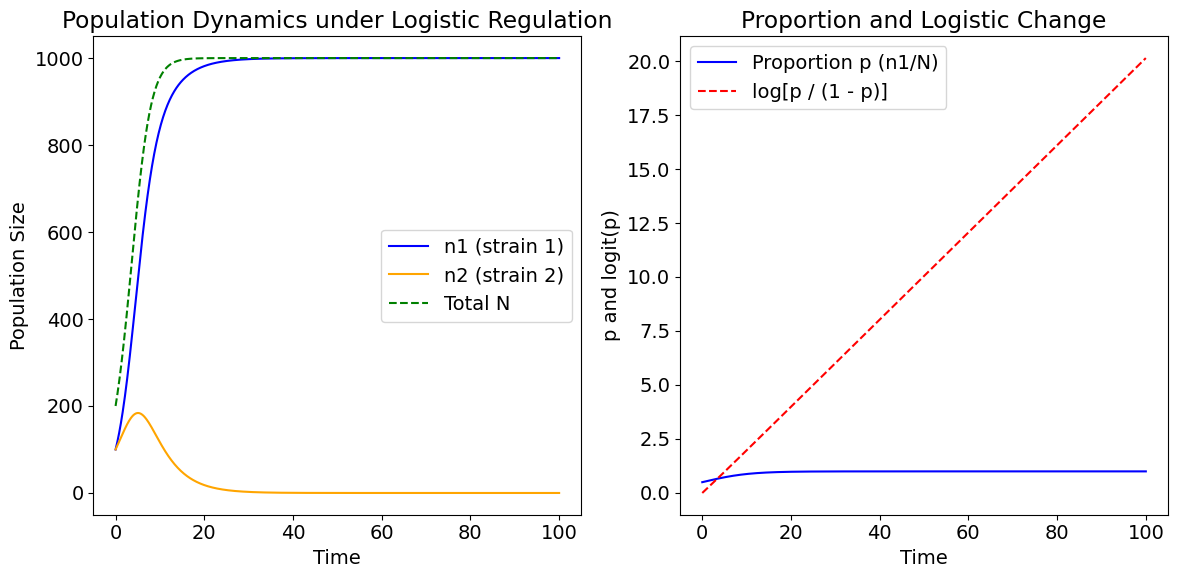

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r1 = 0.5   # growth rate of type 1
r2 = 0.3   # growth rate of type 2
K = 1000   # carrying capacity
n1_0 = 100
n2_0 = 100
T = 100
dt = 0.1
steps = int(T/dt)

# Arrays
n1 = np.zeros(steps)
n2 = np.zeros(steps)
N = np.zeros(steps)
p = np.zeros(steps)
time = np.linspace(0, T, steps)

# Initial conditions
n1[0] = n1_0
n2[0] = n2_0
N[0] = n1_0 + n2_0
p[0] = n1_0 / (n1_0 + n2_0)

# Simulation loop
for t in range(1, steps):
    N[t-1] = n1[t-1] + n2[t-1]
    r_bar = (r1 * n1[t-1] + r2 * n2[t-1]) / N[t-1]
    dn1 = n1[t-1] * (r1 - r_bar * N[t-1]/K) * dt
    dn2 = n2[t-1] * (r2 - r_bar * N[t-1]/K) * dt
    n1[t] = n1[t-1] + dn1
    n2[t] = n2[t-1] + dn2
    N[t] = n1[t] + n2[t]
    p[t] = n1[t] / N[t]

# Plotting
plt.figure(figsize=(12, 6))

# Population numbers
plt.subplot(1, 2, 1)
plt.plot(time, n1, label='n1 (strain 1)', color='blue')
plt.plot(time, n2, label='n2 (strain 2)', color='orange')
plt.plot(time, N, label='Total N', color='green', linestyle='--')
plt.title("Population Dynamics under Logistic Regulation")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.legend()

# Proportion and logit
plt.subplot(1, 2, 2)
logit_p = np.log(p / (1 - p))
plt.plot(time, p, label='Proportion p (n1/N)', color='blue')
plt.plot(time, logit_p, label='log[p / (1 - p)]', color='red', linestyle='--')
plt.title("Proportion and Logistic Change")
plt.xlabel("Time")
plt.ylabel("p and logit(p)")
plt.legend()

plt.tight_layout()
plt.show()


## Weaker Population Control

The previous example assumed that the total population has an absolute upper limit, $k$. We now consider a population that is limited, but the limit is proportional to $r$ so that as one type replaces the other the total population increases. A simple model is

\begin{align}
\frac{dn_1}{dt} = n_1 (r_1 - cN)  &&and&& \frac{dn_2}{dt} = n_2 (r_2 - cN)
\end{align}

It is clear now that population is controlled by a **linear increasing mortality factor** $cN$. So the carrying capacity becomed the proportional to the current mean fitness $\bar r$. The total number changes according to

\begin{align}
\large \frac{dN}{dt} = N( \bar r - cN)
\end{align}


The population reaches a limit when $N= \bar r/c$; for this value $dN/dt = 0$.
The same procedure as before leads to the equation for changes in proportion of type 1,

\begin{align}
\frac{dp_1}{dt}= p_1(r_1 - \bar r)
\end{align}

This situation is probably quite unusual in nature. The size of the population is usually determined mainly by factor other than the $r$'s. A replacement of the original stain by one with a higher $r$ will cause only a slight increase in the final population number, if indeed there is any change at all. The changes in frequency is driven by deviation from the man fitness.

\begin{align}
\frac{d}{dt} ln \left[ \frac{p}{1-p}\right] = r_1 - r_2 ⇒ p(t) = \frac{1}{1+ \left( \frac{1-p_0}{p_0}\right) e^{-rt}}
\end{align}

The point of these three examples is to show that, despite great differences in the way in which the total population changes, the changes in proportion follow the same general rule given before.

The key insight here is that the **relative fitness** differences determine frequency changes, even when **total population size** is governed by different constraints.


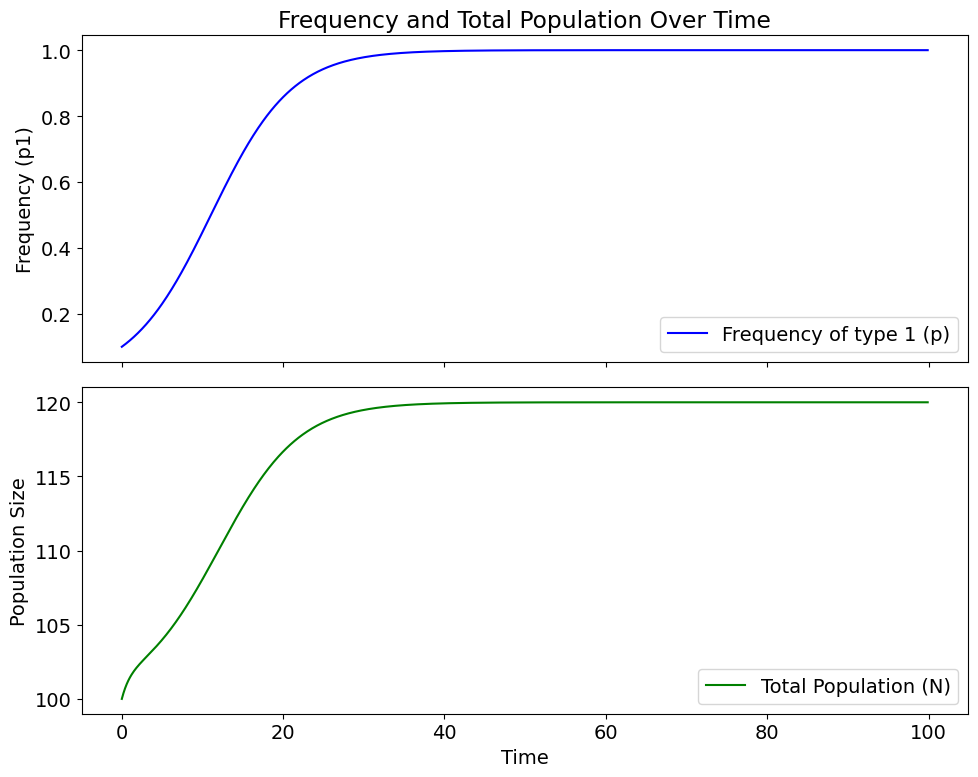

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r1 = 1.2  # intrinsic growth rate of type 1
r2 = 1.0  # intrinsic growth rate of type 2
c = 0.01  # regulation constant

# Time setup
t_max = 100
dt = 0.1
time = np.arange(0, t_max, dt)

# Initial conditions
n1 = [10]
n2 = [90]
N = [n1[0] + n2[0]]
p1 = [n1[0] / N[0]]

# Simulation
for t in time[1:]:
    current_n1 = n1[-1]
    current_n2 = n2[-1]
    current_N = current_n1 + current_n2
    mean_r = (r1 * current_n1 + r2 * current_n2) / current_N

    dn1 = current_n1 * (r1 - c * current_N) * dt
    dn2 = current_n2 * (r2 - c * current_N) * dt

    new_n1 = current_n1 + dn1
    new_n2 = current_n2 + dn2

    n1.append(new_n1)
    n2.append(new_n2)
    N.append(new_n1 + new_n2)
    p1.append(new_n1 / (new_n1 + new_n2))

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Frequency of type 1
ax[0].plot(time, p1, label='Frequency of type 1 (p)', color='blue')
ax[0].set_ylabel('Frequency (p1)')
ax[0].set_title('Frequency and Total Population Over Time')
ax[0].legend()
ax[0].grid(False)

# Total population size
ax[1].plot(time, N, label='Total Population (N)', color='green')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Population Size')
ax[1].legend()
ax[1].grid(False)

plt.tight_layout()
plt.show()


## Regulation by Efficiency of Space or Food Utilization

If populations are regulated by the available space, food, or some other limiting factor, the type that wins in the competition may not be the one with the higher intrinsic rate of increase, but rather the one that can maintain the largest numbers in this environment. The two strains share space and resources where total population size is limited not by a hard ceiling, but by how each strain can utilize the environment. A simple model illustrating this possibility is given by:

\begin{align}
\frac{dn_1}{dt} = r_1 n_1 (K_1 - N)/K_1 &&and&&
\frac{dn_2}{dt} = r_2 n_2 (K_2 - N)/K_2
\end{align}


One interpretation of $K_1$ is that this is the maximum population size that strain 1 can maintain when it is the only species; $K_2$ has the same meaning for strain 2. Suppose that $r_1 = r_2$, but $K_1 \neq K_2$

The change in total number is given by

\begin{align}
\frac{dn_1}{dt} = rN \left[ 1- \frac{n_1}{K_1} - \frac{n_2}{K_2}\right]
\end{align}


where $r = r_1 = r_2$. The change in the proportion of type 1 is

\begin{align}
&\large \frac{d p_1}{dt} = R \cdot p_1 p_2 = R p_1(1-p_1)\\  where&&\\
&R = Nr \left[ \frac{K_1 - K_2}{K_1 K_2}\right]
\end{align}

The presented equation is the general form of the logistic equation but it is not the same since $R$ is not a constant, but it can be considered of logistic form showing frequency-dependecy selection. However, in many cases $R$ is changing slowly and an equation like that described the rate of change at any particular time.

In an uncrowded environment the success of a population is determined mainly by its intrinsic rate of increase, $r$. In a crowded environment the carrying capacity, $K$, for the species may be more important. MacArthur and Wilson (1967) refer to 'r selection' and 'K selection.' In an uncrowded environment (r selection) types which harvest the most food, even if they are wastfull, have largest rate of increase. On the other hand, in a crowded environment (K selection) there is great value on efficiency of utilization rather than simple productivity.

Those equations are widely appliable, even when populations may differ greatly in their states. The total population may be growing, or static, or decreasing and the different genotypes may differ in intrinsic birth rates, death rates, or their response to the environment; yet the equations for changes in proportions may be basically similar. For these reason, population genetics has usually ignored the total numbers and concentrated on the proportions.



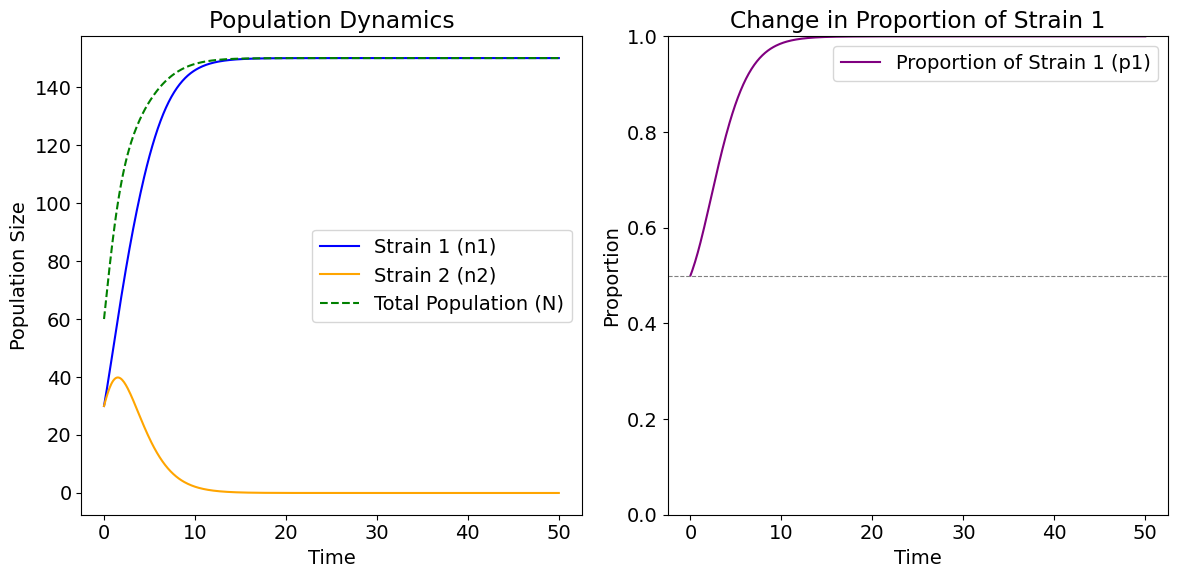

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
r = 1.0          # Intrinsic growth rate (same for both)
K1 = 150         # Carrying capacity for strain 1
K2 = 100         # Carrying capacity for strain 2

# Initial conditions
n1_0 = 30
n2_0 = 30
N0 = n1_0 + n2_0

# Time span
t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)

# Differential equations
def competitive_growth(t, y):
    n1, n2 = y
    N = n1 + n2
    dn1dt = r * n1 * (K1 - N) / K1
    dn2dt = r * n2 * (K2 - N) / K2
    return [dn1dt, dn2dt]

# Solve ODEs
sol = solve_ivp(competitive_growth, t_span, [n1_0, n2_0], t_eval=t_eval)

# Extract solutions
n1 = sol.y[0]
n2 = sol.y[1]
N = n1 + n2
p1 = n1 / N

# Plotting
plt.figure(figsize=(12, 6))

# Plot absolute numbers
plt.subplot(1, 2, 1)
plt.plot(sol.t, n1, label="Strain 1 (n1)", color="blue")
plt.plot(sol.t, n2, label="Strain 2 (n2)", color="orange")
plt.plot(sol.t, N, label="Total Population (N)", color="green", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.title("Population Dynamics")
plt.legend()

# Plot proportion
plt.subplot(1, 2, 2)
plt.plot(sol.t, p1, label="Proportion of Strain 1 (p1)", color="purple")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.title("Change in Proportion of Strain 1")
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.8)
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()
